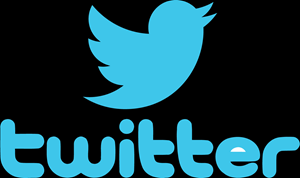

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 1- import  libraries 

In [ ]:
import pandas as pd 
import numpy as np 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.linear_model import LogisticRegression

# 2. Data Exploration

In [ ]:
nltk.download("stopwords")
train=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
train.head()

# 3. Data Preprocessing

In [ ]:
train.isnull().sum().sort_values(ascending=False)
test.isnull().sum().sort_values(ascending=False)

*** we will delete columns that have null values**

In [ ]:
train=train.drop(["location","keyword","id"] , axis=1)
test= test.drop(["location","keyword","id"] , axis=1)
train.columns


In [ ]:
train["text"].head()


In [ ]:
test.shape

# 4- NLP processing

*   remove unwanted symboles
*  conver words to lowercase
*  remove stepwords
* stemming words

In [ ]:
corpus=[]
length=len(train["text"])
for i in range(length):
    
    tweet=re.sub('[^a-zA-z]'," " ,train["text"][i])
    tweet=tweet.lower()
    tweet=tweet.split()
    ps=PorterStemmer()
    tweet=[ ps.stem(word) for word in tweet  if not word in set(stopwords.words('english'))]
    tweet=" ".join(tweet)

    corpus.append(tweet)

corpus1=[]
length1=len(test["text"])
for i in range(length1):
    
    tweet1=re.sub('[^a-zA-z]'," " ,test["text"][i])
    tweet1=tweet1.lower()
    tweet1=tweet1.split()
    ps=PorterStemmer()
    tweet1=[ ps.stem(word1) for word1 in tweet1  if not word1 in set(stopwords.words('english'))]
    tweet1=" ".join(tweet1)

    corpus1.append(tweet1)

# 5- MODEL BUILDING

In [ ]:
cv=CountVectorizer()    
X=cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

In [ ]:
X_test=cv.transform(test["text"]).toarray()

In [ ]:
X_test.shape

In [ ]:
y=train["target"]


print("x shape is :", X.shape)
print("y shape is :", y.shape)



In [ ]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=.2 , random_state=33 , shuffle=True)


In [ ]:
print("x_train.shape is: ",X_train.shape)
print("y_train.shape is: ",y_train.shape)

# 6-A: Logistic Regression

In [ ]:
lr = LogisticRegression()  

lr.fit(X_train,y_train)

In [ ]:
y_valid=lr.predict(X_valid)

In [ ]:
y_valid

# 6-B-DECISION TREE CLASSIFIER

In [ ]:
decisionTreeModel = DecisionTreeClassifier(criterion= 'entropy',max_depth = 10,max_leaf_nodes=30, random_state=55)

decisionTreeModel.fit(X_train,y_train)

In [ ]:
y_valid=decisionTreeModel.predict(X_valid)

# 7- model evaluation

In [ ]:
models=[decisionTreeModel,lr]
for model in models:
    print(type(model ) ,"train score is :" ,model.score(X_train , y_train) )
    print(type(model ) ,"test score is :" ,model.score(X_valid , y_valid) )
    y_pred=model.predict(X_test)
    print(type(model ) ,"test score is :" ,model.score(X_test , y_pred) )
    


In [ ]:
y_pred

# predict the model 


In [ ]:
output = pd.DataFrame({'target': y_pred})
output.to_csv('submission.csv', index=False)

In [ ]:
output.head()